In [11]:
from datasets import load_dataset
from pprint import pprint

### **<span style="color:orange">Data exploration</span>**
**<span style="color:yellow">Load the dataset</span>**

In [4]:
dataset = load_dataset("nielsr/docvqa_1200_examples")

**<span style="color:yellow">Dataset structure</span>**

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
        num_rows: 1000
    })
    test: Dataset({
        features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
        num_rows: 200
    })
})

**<span style="color:yellow">Loading a sample image</span>**

In [6]:
sample_data = dataset["train"]
sample_data

Dataset({
    features: ['id', 'image', 'query', 'answers', 'words', 'bounding_boxes', 'answer'],
    num_rows: 1000
})

In [7]:
sample_data = dataset["train"][0]

In [8]:
sample_data["id"]

'train_0'

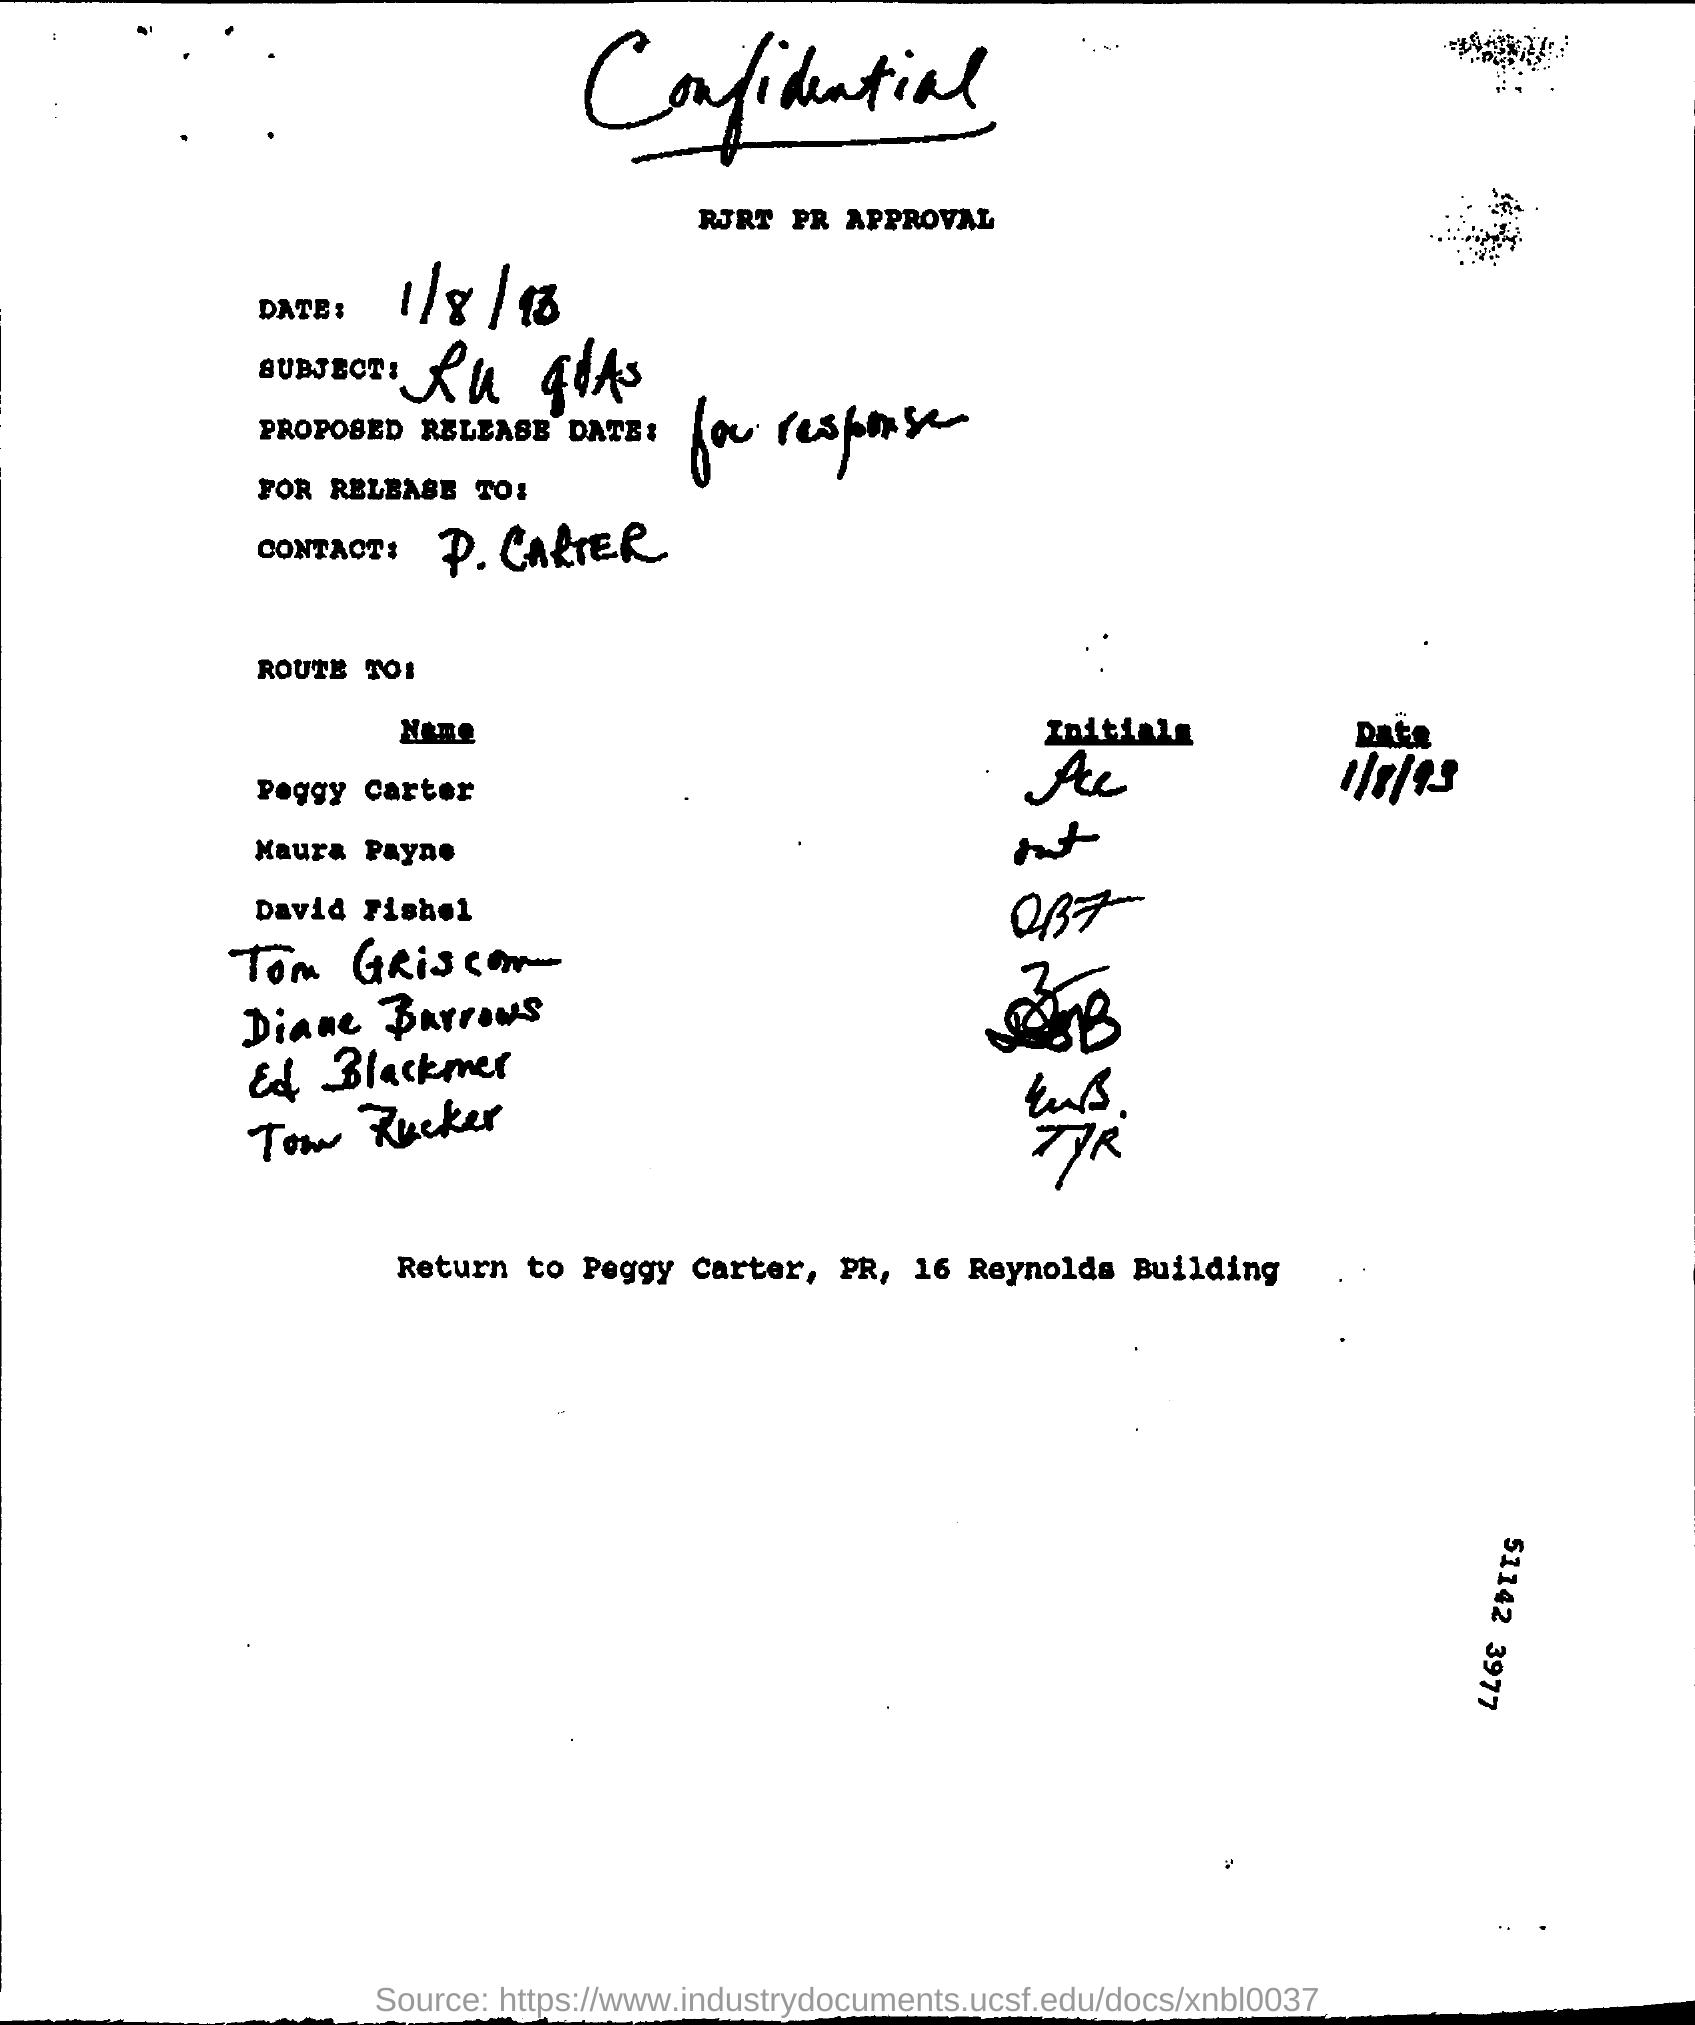

In [9]:
sample_image = dataset["train"][0]["image"]
sample_image

**<span style="color:yellow">Checking image sizes in the training set</span>**

In [8]:
image_size_list = []
for i in range(len(dataset["train"])):
    image_size_list.append(dataset["train"][i]["image"].size)

print(len(set(image_size_list)), "unique image sizes exist in the dataset.")
print()
set(image_size_list)

167 unique image sizes exist in the dataset.



{(399, 1171),
 (463, 610),
 (692, 430),
 (775, 904),
 (792, 1782),
 (792, 1784),
 (830, 595),
 (842, 586),
 (854, 613),
 (857, 614),
 (861, 1821),
 (883, 1223),
 (891, 790),
 (975, 704),
 (1050, 581),
 (1097, 1693),
 (1246, 1754),
 (1450, 2198),
 (1487, 1778),
 (1489, 3120),
 (1492, 3117),
 (1493, 2360),
 (1496, 2356),
 (1532, 1862),
 (1587, 2114),
 (1589, 2084),
 (1595, 2175),
 (1600, 2100),
 (1602, 2102),
 (1604, 2103),
 (1605, 2118),
 (1606, 2104),
 (1607, 2106),
 (1609, 2167),
 (1613, 2185),
 (1620, 2186),
 (1623, 2118),
 (1625, 2192),
 (1631, 2204),
 (1654, 2303),
 (1654, 2339),
 (1656, 2304),
 (1662, 2169),
 (1669, 2279),
 (1670, 2164),
 (1675, 2166),
 (1675, 2169),
 (1676, 2180),
 (1679, 2169),
 (1684, 2180),
 (1685, 2285),
 (1687, 2279),
 (1689, 2194),
 (1689, 2280),
 (1689, 2285),
 (1690, 2182),
 (1692, 2245),
 (1693, 2283),
 (1693, 2286),
 (1693, 2287),
 (1694, 2277),
 (1694, 2279),
 (1694, 2284),
 (1695, 2025),
 (1695, 2148),
 (1695, 2164),
 (1695, 2193),
 (1695, 2200),
 (16

**<span style="color:yellow">Checking if all the samples have the query in 5 different languages</span>**

In [9]:
query_size = []
for i in range(len(dataset["train"])):
    # image_size_list.append(dataset["train"][i]["image"].size)
    query_size.append(len(dataset["train"][i]["query"]))

set(query_size)

{5}

**<span style="color:yellow">Checking the number of available answers per sample in the dataset</span>**

In [10]:
answer_size = []
for i in range(len(dataset["train"])):
    # image_size_list.append(dataset["train"][i]["image"].size)
    answer_size.append(len(dataset["train"][i]["answers"]))

set(answer_size)

{1, 2, 3, 4, 5}

**<span style="color:yellow">Query and answers for an example with 5 available answers</span>**

In [11]:
answer_size = []
for i in range(len(dataset["train"])):
    if len(dataset["train"][i]["answers"])==5:
        print(dataset["train"][i]["query"])
        print(dataset["train"][i]["answers"])

{'de': 'Wie heißt die Tabakfirma?', 'en': 'What is the name of the tobacco company?', 'es': '¿Cuál es el nombre de la empresa tabacalera?', 'fr': 'Quel est le nom de la société de tabac?', 'it': "Come si chiama l'azienda del tabacco?"}
['RJ Reynolds', 'RJREYNOLDS tobacco company', 'R J Reynolds', 'R J Reynolds tobacco company', 'RJ REYNOLDS']


**<span style="color:yellow">Query and answers for an example with 1 available answer</span>**

In [12]:
pprint(sample_data["query"])
pprint(sample_data["answers"])

{'de': 'Wie lautet das Datum, das in diesem Brief erwähnt wird?',
 'en': 'what is the date mentioned in this letter?',
 'es': '¿Cuál es la fecha mencionada en esta carta?',
 'fr': 'Quelle est la date mentionnée dans cette lettre?',
 'it': 'Qual è la data indicata in questa lettera?'}
['1/8/93']


**<span style="color:yellow">Sample data full structure</span>**

In [17]:
sample_data

{'id': 'train_0',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1695x2025>,
 'query': {'de': 'Wie lautet das Datum, das in diesem Brief erwähnt wird?',
  'en': 'what is the date mentioned in this letter?',
  'es': '¿Cuál es la fecha mencionada en esta carta?',
  'fr': 'Quelle est la date mentionnée dans cette lettre?',
  'it': 'Qual è la data indicata in questa lettera?'},
 'answers': ['1/8/93'],
 'words': ['Confidential',
  '..',
  '..',
  'RJRT',
  'PR',
  'APPROVAL',
  'DATE',
  ':',
  '1/8/13',
  'Ru',
  'alAs',
  'PROPOSED',
  'RELEASE',
  'DATE:',
  'for',
  'response',
  'FOR',
  'RELEASE',
  'TO:',
  'CONTACT:',
  'P.',
  'CARTER',
  'ROUTE',
  'TO',
  'Initials',
  'pate',
  'Peggy',
  'Carter',
  'Ac',
  'Maura',
  'Payne',
  'David',
  'Fishel',
  'Tom',
  'GRISCom',
  'Diane',
  'Barrows',
  'Ed',
  'Blackmer',
  'Tow',
  'Rucker',
  'TR',
  'Return',
  'to',
  'Peggy',
  'Carter,',
  'PR,',
  '16',
  'Reynolds',
  'Building',
  '51142',
  '3977',
  '.',
  

In [18]:
answer_token_sequences = []
for sample in dataset["train"]:
    # ground_truth = sample["answers"]
    if "answers" in sample:
        assert isinstance(sample["answers"], list)
        answers = sample["answers"]
    answer_token_sequences.append(answers)
print(len(answer_token_sequences))

1000


In [19]:
from torch.utils.data import Dataset
from typing import Any, Dict
import random

class LlavaDataset(Dataset):
    """
    PyTorch Dataset for LLaVa. This class takes a HuggingFace Dataset as input.

    Each row, consists of image path(png/jpg/jpeg) and ground truth data (json/jsonl/txt).
    """

    def __init__(
        self,
        dataset_name_or_path: str,
        split: str = "train",
    ):
        super().__init__()

        self.split = split

        self.dataset = load_dataset(dataset_name_or_path, split=self.split)
        self.dataset_length = len(self.dataset)

        self.answer_token_sequences = []
        self.query_list = []
        for sample in dataset["train"]:
            if "answers" in sample:
                assert isinstance(sample["answers"], list)
                self.answer_token_sequences.append(sample["answers"])
                self.query_list.append(sample["query"]["en"])


    def __len__(self) -> int:
        return self.dataset_length

    def __getitem__(self, idx: int) -> Dict:
        """
        Returns one item of the dataset.

        Returns:
            image : the original Receipt image
            target_sequence : tokenized ground truth sequence
        """
        sample = self.dataset[idx]

        # inputs
        image = sample["image"]
        en_query = self.query_list[idx]
        target_sequence = random.choice(self.answer_token_sequences[idx]) # can be more than one, e.g., DocVQA Task 1
        return image, en_query, target_sequence

In [20]:
train_dataset = LlavaDataset("nielsr/docvqa_1200_examples",  split="train")
val_dataset = LlavaDataset("nielsr/docvqa_1200_examples", split="test")

In [21]:
counter = 0
for idx in range(len(train_dataset)):
    image, en_query, target_sequence = train_dataset[idx]
    print("Question:", en_query, "--- Answer:", target_sequence)
    counter +=1
    if counter == 10:
        break

Question: what is the date mentioned in this letter? --- Answer: 1/8/93
Question: Who is in  cc in this letter? --- Answer: T.F. Riehl
Question: what is the subject of  this letter? --- Answer: Review of existing Brainstorming Ideas/483
Question: What is the number at the bottom of the page, in bold? --- Answer: 499150498
Question: How many points are there in modifications to readout instrumentation --- Answer: 5
Question: what is the date in the letter --- Answer: June 11, 1990
Question: Who sent the letter? --- Answer: Ted Sanders
Question: Which part of Virginia is this letter sent from --- Answer: Richmond
Question: What sort of communication/letter is this ? --- Answer: INTER-OFFICE CORRESPONDENCE
Question: What is the date mentioned in the letter? --- Answer: April 27, 1990


**We also need to modify the `train_collate_fn` to be matched with the structre of docvqa**

In [22]:
def train_collate_fn(examples):
    images = []
    texts = []
    for example in examples:
        image, en_query, ground_truth = example
        images.append(image)
        prompt = f"[INST] <image>\n{en_query} [\INST] {ground_truth}"
        texts.append(prompt)

    batch = processor(text=texts, images=images, padding=True, truncation=True, max_length=MAX_LENGTH, return_tensors="pt")

    labels = batch["input_ids"].clone()
    labels[labels == processor.tokenizer.pad_token_id] = -100
    batch["labels"] = labels

    input_ids = batch["input_ids"]
    attention_mask = batch["attention_mask"]
    pixel_values = batch["pixel_values"]
    image_sizes = batch["image_sizes"]
    labels = batch["labels"]

    return input_ids, attention_mask, pixel_values, image_sizes, labels

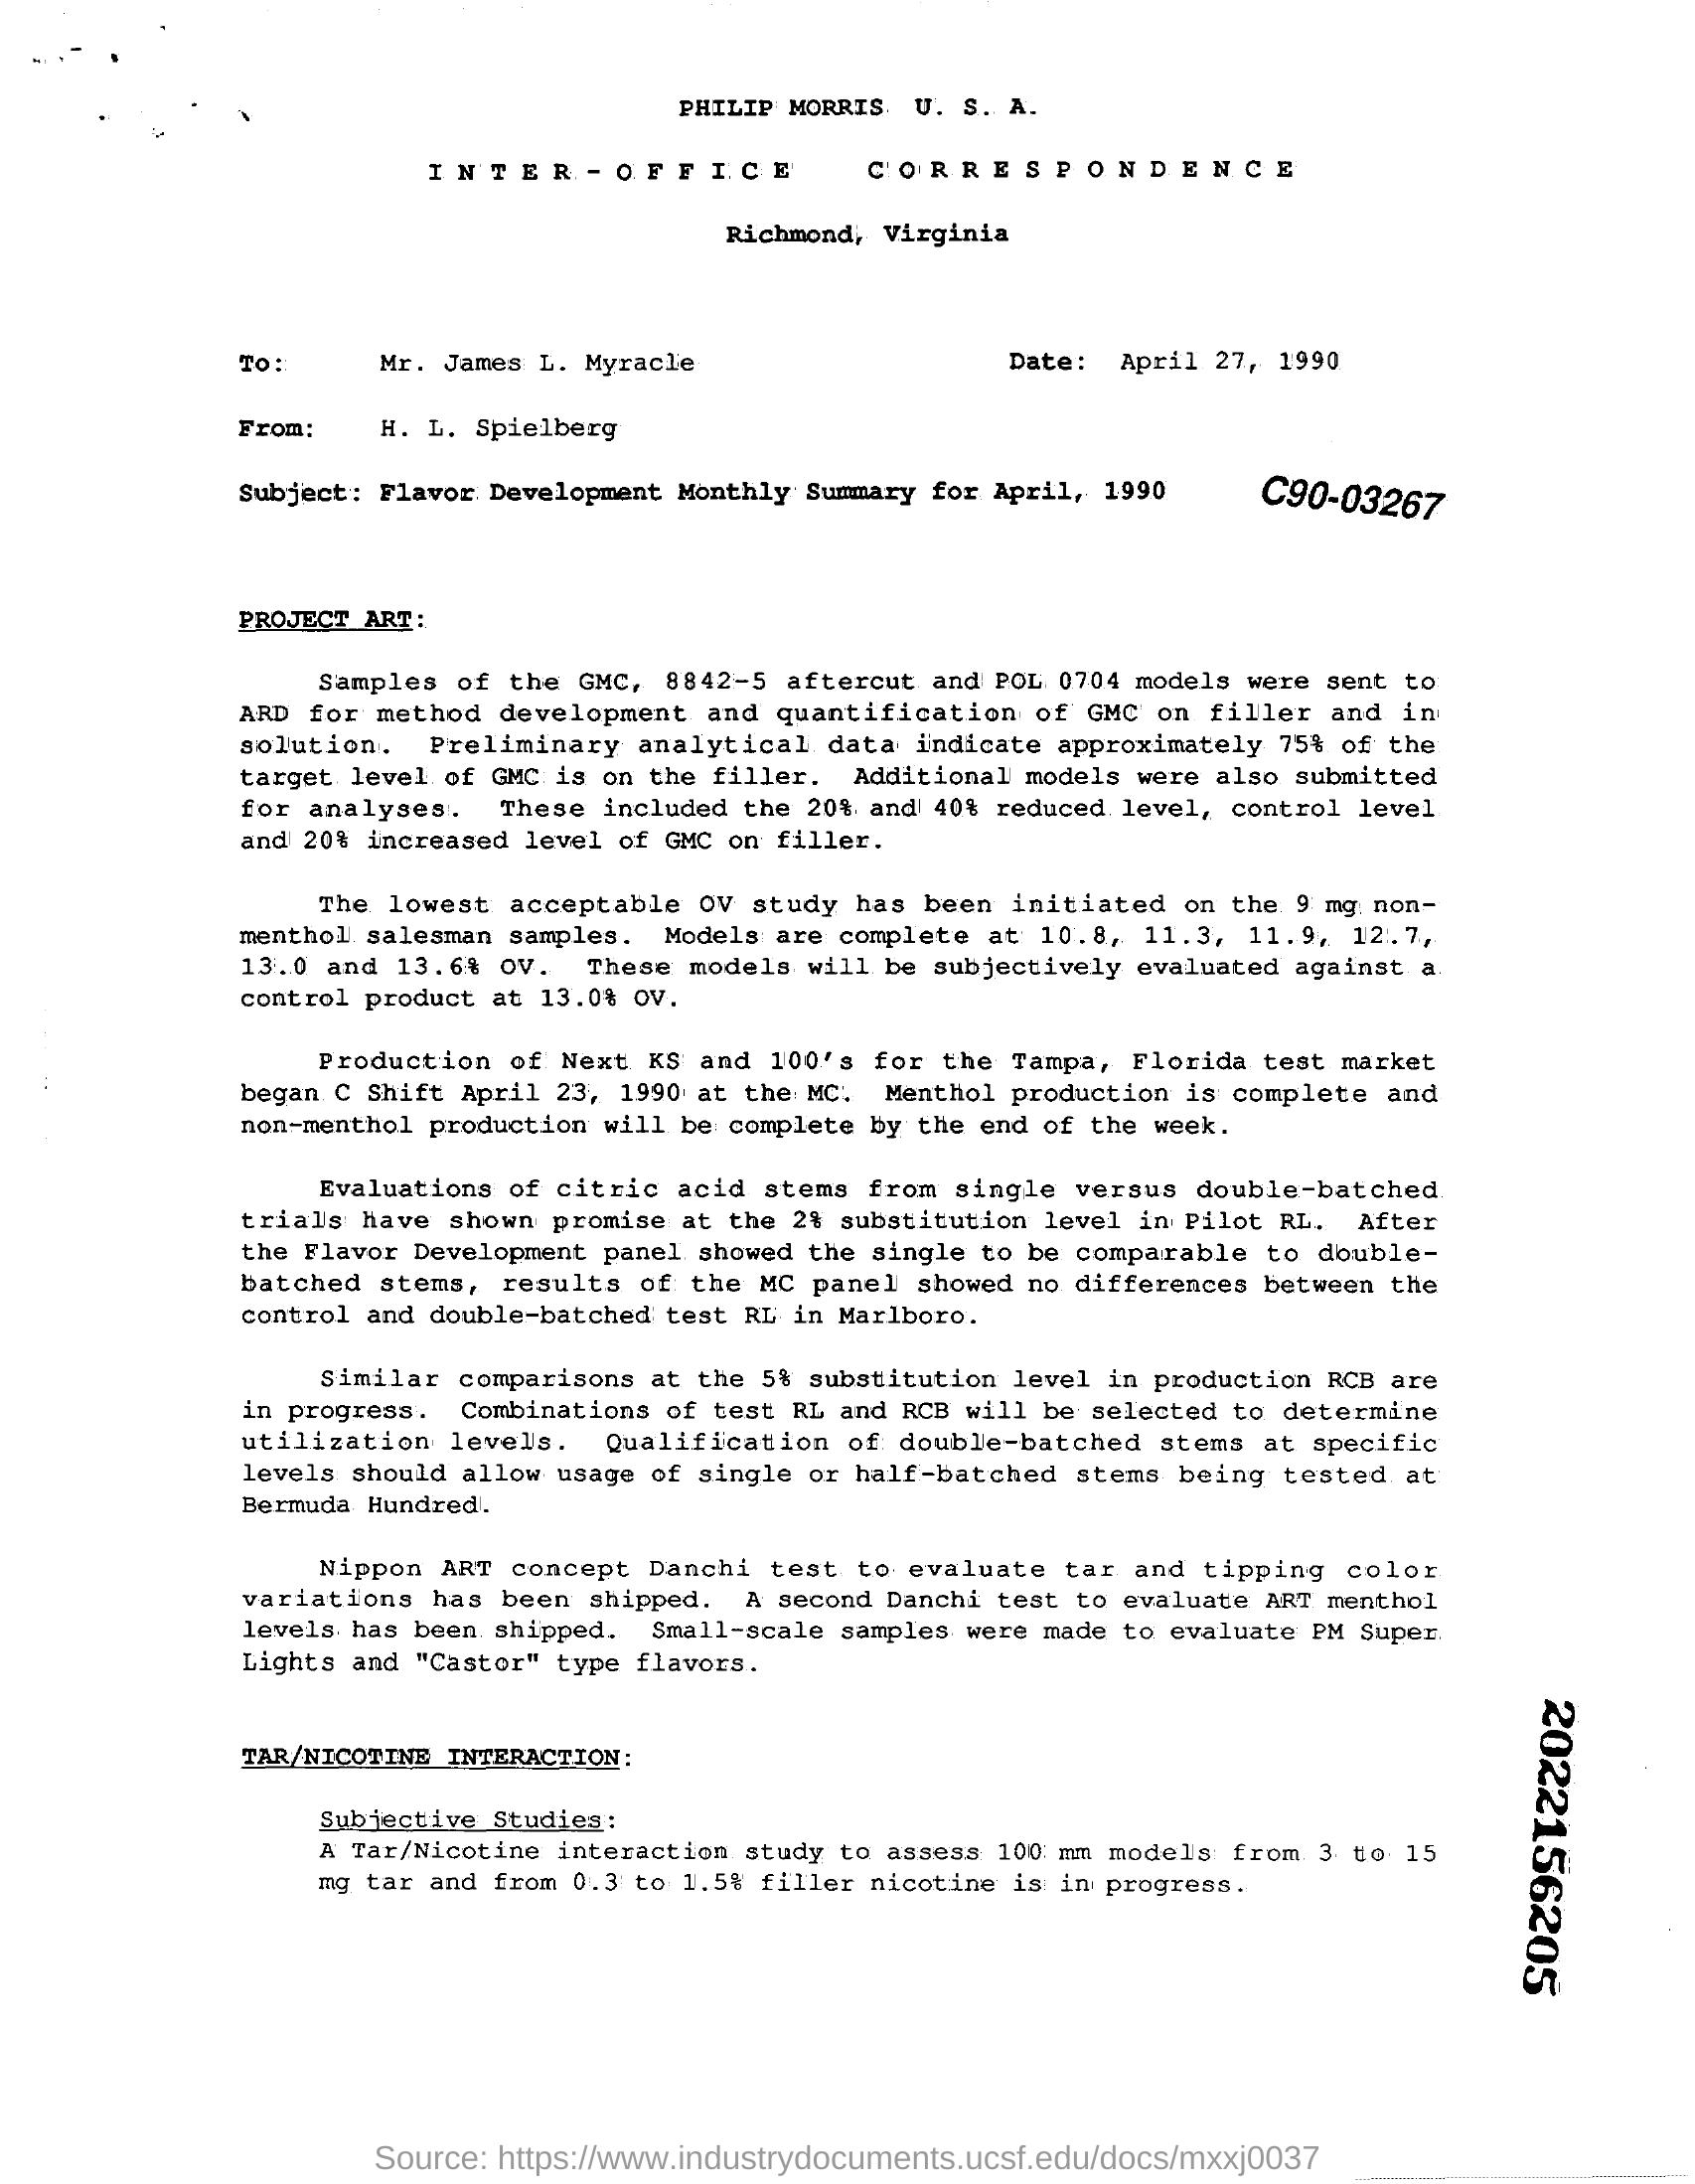

In [23]:
image

In [24]:
dataset["train"][i]

{'id': 'train_1239',
 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=1700x2204>,
 'query': {'de': 'Welche Corporation wird auf dem Briefkopf erwähnt?',
  'en': 'Which Corporation is mentioned on the letterhead?',
  'es': '¿Qué Corporación se menciona en el membrete?',
  'fr': "Quelle société est mentionnée sur l'en-tête?",
  'it': 'Quale corporazione è menzionata sulla carta intestata?'},
 'answers': ['greatwestern united corporation',
  'GreatWestern United Corporation',
  'GreatWestern United'],
 'words': ['INTER-OFFICE',
  'MEMORANDUM',
  'GreatWestern',
  'United',
  'Corporation',
  'TO:',
  'Blake',
  'McFeely',
  'DATE:',
  '7/6/71',
  'FROM:',
  'Barb',
  'MacDonald',
  'SUBJECT:',
  'Overview',
  '-',
  'Labor',
  '1971',
  'Blake:',
  'Per',
  'your',
  'request',
  'the',
  'following',
  'is',
  'a',
  'brief',
  'description',
  'of',
  'labor',
  'as',
  'it',
  'is',
  'characterized',
  'in',
  'recent',
  'literature.',
  'The',
  'following',
  'informa